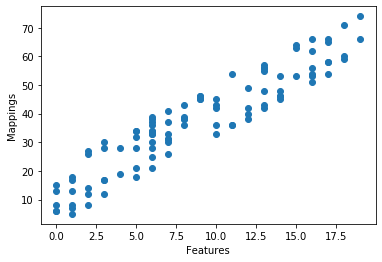

In [27]:
import numpy as np
from matplotlib import pyplot as plt

FRAME_LENGTH = 100

def prepareData(frames):
    return np.random.randint(20, size=frames)

def scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("Features")
    plt.ylabel("Mappings")
    plt.show()

def plot_fit_line(X, y, y_pred):
    plt.plot(X, y_pred, c="r")
    plt.scatter(X, y, c="b")
    plt.xlabel("Features")
    plt.ylabel("Mapping")
    plt.show()

X = prepareData(FRAME_LENGTH)
y = 2 + 3*X + np.random.randint(20, size=FRAME_LENGTH)
# X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
# y = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

scatter(X, y)



    r:- 1.0248149602101493
    R2:- 0.8753395493737378
    learning_rate:- 0.005


+----+----+--------------------+
| X  | y  |       y_pred       |
+----+----+--------------------+
| 15 | 63 | 55.625847388689984 |
| 13 | 55 | 49.835511687185694 |
| 13 | 42 | 49.835511687185694 |
| 5  | 28 | 26.67416888116853  |
| 11 | 54 | 44.045175985681404 |
| 1  | 18 | 15.093497478159948 |
| 7  | 26 | 32.464504582672824 |
| 14 | 53 | 52.73067953793784  |
| 18 | 60 | 64.31135094094643  |
| 14 | 46 | 52.73067953793784  |
| 12 | 49 | 46.94034383643355  |
| 3  | 17 | 20.88383317966424  |
| 13 | 48 | 49.835511687185694 |
| 10 | 42 | 41.15000813492926  |
| 1  | 13 | 15.093497478159948 |
| 0  | 8  | 12.198329627407803 |
| 18 | 59 | 64.31135094094643  |
| 11 | 36 | 44.045175985681404 |
| 0  | 13 | 12.198329627407803 |
| 6  | 37 | 29.56933673192068  |
| 2  | 26 | 17.988665328912095 |
| 1  | 8  | 15.093497478159948 |
| 2  | 12 | 17.988665328912095 |
| 3  | 30 | 20.88383317966424  |
| 2  | 8  | 17.988665328

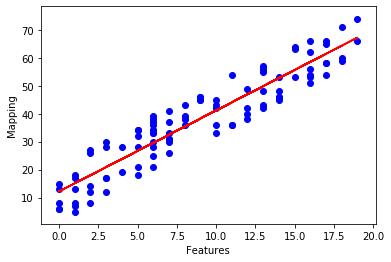

In [28]:
# from tabulate import tabulate
from prettytable import PrettyTable
import random

def getCost(H, y):
    return np.sum((H - y) ** 2)

def sumOfSquares(y1, y2):
    S = 0
    if type(y2) is float:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2) ** 2
            S += diff_square
        return S
    else:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2[i]) ** 2
            S += diff_square
        return S

def train(X, y, learning_rate):
    

    ø0 = 2 * random.uniform(0, 1) - 1
    ø1 = 2 * random.uniform(0, 1) - 1

    cycles = 10000
    m = float(len(X))

    for i in range(cycles):
        y_pred = (ø1 * X) + ø0
        dø1 = (-2 / m) * np.sum(X * (y - y_pred))
        dø0 = (-2 / m) * np.sum(y - y_pred)
        ø0 = ø0 - (learning_rate * dø0)
        ø1 = ø1 - (learning_rate * dø1)

    y_pred = ø0 + ø1 * X # Prediction after correction of weights

    y_mean = float(np.mean(y))
    X_mean = float(np.mean(X))

    SS_res = sumOfSquares(y, y_pred)
    SS_tot = sumOfSquares(y, y_mean)

    R2 = 1.0 - (SS_res / SS_tot) # R2 (Coefficient of Determination) determined by 1 - (SS_res / SS_tot)
    
    return [ø0, ø1, R2]

learning_rate_ = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
ø0_ = []
ø1_ = []
R2_ = []

for i in range(len(learning_rate_)):
    result = train(X, y, learning_rate_[i])
    ø0_.append(result[0])
    ø1_.append(result[1])
    R2_.append(result[2])

_index = R2_.index(max(R2_))
ø0 = ø0_[_index]
ø1 = ø1_[_index]
R2 = R2_[_index]
learning_rate = learning_rate_[_index]

var_X = np.var(X)
var_y = np.var(y)
X_mean = np.mean(X)
y_mean = np.mean(y)

SS_xy = np.sum((X - X_mean) * (y - y_mean))

r_deg_correlation = SS_xy / (var_X * var_y) # Degree of correlation defined as SS_xy / (var(X) * var(Y))

print('''

    r:- {}
    R2:- {}
    learning_rate:- {}

'''.format(r_deg_correlation, R2, learning_rate))

y_pred = ø0 + ø1 * X

table = PrettyTable(['X', 'y', 'y_pred'])
for i in range(len(X)):
    table.add_row([str(X[i]), str(y[i]), str(y_pred[i])])

print(table)

plot_fit_line(X, y, y_pred)
